In [382]:
# 11.20 패치 이후 11.21 패치 이전 기간동안의 검색빈도
df_20 = pd.DataFrame({"챔프명":s1,"20빈도":s2})
df_20

,챔프명,20빈도
0,가렌,143
1,갈리오,556
2,그라가스,343
3,그레이브즈,54
4,그웬,0
...,...,...
158,피들,809
159,딩거,27
160,리신,0
161,아트,418


In [383]:
# 11.21 패치 이후 11.22 패치 이전 기간동안의 검색빈도
df_21 = pd.DataFrame({"챔프명":s1,"21빈도":s3})
df_21

,챔프명,21빈도
0,가렌,113
1,갈리오,329
2,그라가스,145
3,그레이브즈,52
4,그웬,459
...,...,...
158,피들,49
159,딩거,22
160,리신,1546
161,아트,431


In [384]:
# 11.22 패치 이후 11.23 패치 이전 기간동안의 검색빈도
df_22 = pd.DataFrame({"챔프명":s1,"22빈도":s4})
df_22

,챔프명,22빈도
0,가렌,177
1,갈리오,54
2,그라가스,152
3,그레이브즈,49
4,그웬,1382
...,...,...
158,피들,25
159,딩거,65
160,리신,594
161,아트,101


In [385]:
# 11.23 패치 이후 11.24 패치 이전 기간동안의 검색빈도
df_23 = pd.DataFrame({"챔프명":s1,"23빈도":s4})
df_23

,챔프명,23빈도
0,가렌,177
1,갈리오,54
2,그라가스,152
3,그레이브즈,49
4,그웬,1382
...,...,...
158,피들,25
159,딩거,65
160,리신,594
161,아트,101


In [386]:
# 전체적인 분포를 보는 DataFrame
df_all = pd.DataFrame({"챔프명":s1,"20빈도":s2,"21빈도":s3,"22빈도":s4,"23빈도":s5})
df_all

,챔프명,20빈도,21빈도,22빈도,23빈도
0,가렌,143,113,177,108
1,갈리오,556,329,54,72
2,그라가스,343,145,152,37
3,그레이브즈,54,52,49,13
4,그웬,0,459,1382,829
...,...,...,...,...,...
158,피들,809,49,25,43
159,딩거,27,22,65,49
160,리신,0,1546,594,226
161,아트,418,431,101,204


### 워드클라우드를 이용한 언급 빈도 시각화

In [363]:
# 빈도수의 시각화를 위한 WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [364]:
# 워드클라우드에 사용 될 폰트 설정
font_fname = 'C:/Windows/Fonts/H2PORL.TTF'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

In [387]:
data = dict(zip(df_all['챔프명'].tolist(), df_all['20빈도'].tolist()))

In [390]:
data2 = dict(zip(df_all['챔프명'].tolist(), df_all['21빈도'].tolist()))

In [391]:
data3 = dict(zip(df_all['챔프명'].tolist(), df_all['22빈도'].tolist()))

In [392]:
data4 = dict(zip(df_all['챔프명'].tolist(), df_all['23빈도'].tolist()))

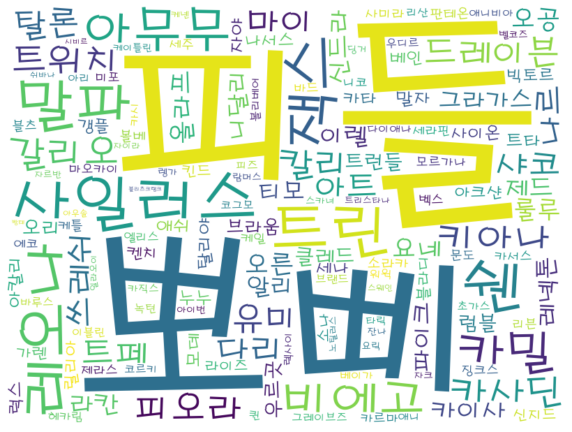

In [388]:
font_path = "C:/Windows/Fonts/H2PORL.TTF"
wc = WordCloud(font_path,
               background_color='white',
               width=800, height=600 ,
               max_words=200)                                         #단어갯수
cloud = wc.generate_from_frequencies(data)                            #사전형태 데이터

plt.figure(figsize=(10,10))                                           #액자사이즈설정
plt.axis('off')                                                       #테두리 선 없애기
plt.imshow(cloud,interpolation="bilinear")

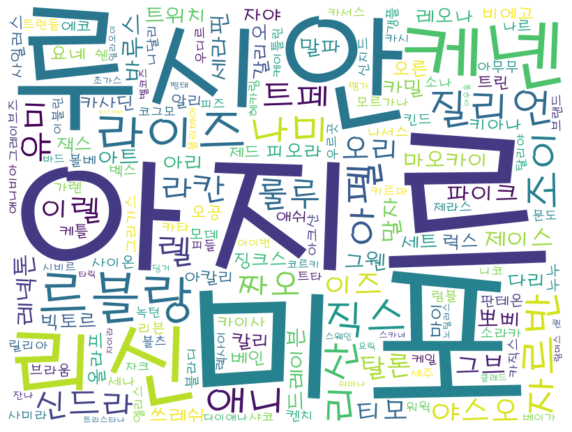

In [393]:
font_path = "C:/Windows/Fonts/H2PORL.TTF"
wc = WordCloud(font_path,
               background_color='white',
               width=800, height=600 ,
               max_words=200)                                         #단어갯수
cloud = wc.generate_from_frequencies(data2)                            #사전형태 데이터

plt.figure(figsize=(10,10))                                           #액자사이즈설정
plt.axis('off')                                                       #테두리 선 없애기
plt.imshow(cloud,interpolation="bilinear")

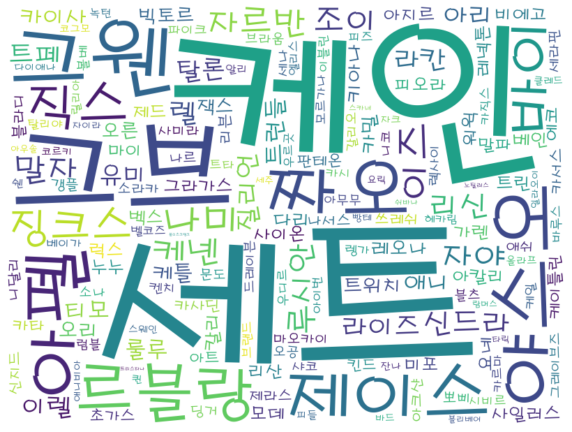

In [394]:
font_path = "C:/Windows/Fonts/H2PORL.TTF"
wc = WordCloud(font_path,
               background_color='white',
               width=800, height=600 ,
               max_words=200)                                         #단어갯수
cloud = wc.generate_from_frequencies(data3)                            #사전형태 데이터

plt.figure(figsize=(10,10))                                           #액자사이즈설정
plt.axis('off')                                                       #테두리 선 없애기
plt.imshow(cloud,interpolation="bilinear")

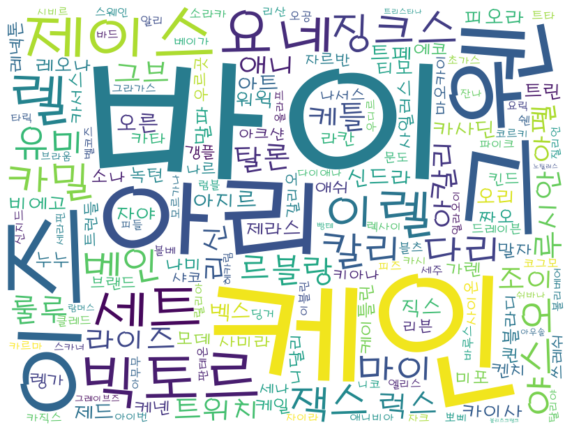

In [395]:
font_path = "C:/Windows/Fonts/H2PORL.TTF"
wc = WordCloud(font_path,
               background_color='white',
               width=800, height=600 ,
               max_words=200)                                         #단어갯수
cloud = wc.generate_from_frequencies(data4)                            #사전형태 데이터

plt.figure(figsize=(10,10))                                           #액자사이즈설정
plt.axis('off')                                                       #테두리 선 없애기
plt.imshow(cloud,interpolation="bilinear")

### 실제 패치노트와 비교

In [401]:
# 챔피언은 게임 내 성능과 상관없이 선호도가 존재 , 선호도에 따른 높은 빈도를 보정하기 위해 변화율 값 추가
df_all["변화율20~21"] =  round(((df_all["21빈도"] - df_all["20빈도"])/(df_all["21빈도"] + df_all["20빈도"]))*1000)
df_all["변화율21~22"] =  round(((df_all["22빈도"] - df_all["21빈도"])/(df_all["22빈도"] + df_all["21빈도"]))*1000)
df_all["변화율22~23"] =  round(((df_all["23빈도"] - df_all["22빈도"])/(df_all["23빈도"] + df_all["22빈도"]))*1000)
df_all = df_all.drop("변화율1" ,axis=1)
df_all

,챔프명,20빈도,21빈도,22빈도,23빈도,변화율20~21,변화율21~22,변화율22~23
0,가렌,143,113,177,108,-117.0,221.0,-242.0
1,갈리오,556,329,54,72,-256.0,-718.0,143.0
2,그라가스,343,145,152,37,-406.0,24.0,-608.0
3,그레이브즈,54,52,49,13,-19.0,-30.0,-581.0
4,그웬,0,459,1382,829,1000.0,501.0,-250.0
...,...,...,...,...,...,...,...,...
158,피들,809,49,25,43,-886.0,-324.0,265.0
159,딩거,27,22,65,49,-102.0,494.0,-140.0
160,리신,0,1546,594,226,1000.0,-445.0,-449.0
161,아트,418,431,101,204,15.0,-620.0,338.0


In [428]:
# 빈도 변화의 경향성이 있는지 보는 그래프 시각화
df_base = df_all.drop(["변화율20~21","변화율21~22","변화율22~23"], axis=1)
df_base2 = df_base.drop("20빈도",axis =1)

<AxesSubplot:>

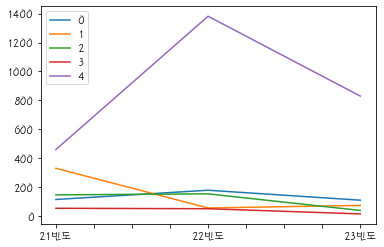

In [430]:
df_line = df_base2[:5]
df_for_graph = df_line.drop("챔프명", axis =1)
df_for_graph = df_for_graph.T
df_for_graph.plot()

<AxesSubplot:>

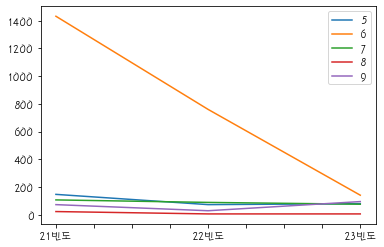

In [431]:
df_line = df_base2[5:10]
df_for_graph = df_line.drop("챔프명", axis =1)
df_for_graph = df_for_graph.T
df_for_graph.plot()

<AxesSubplot:>

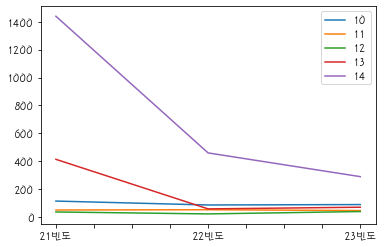

In [432]:
df_line = df_base2[10:15]
df_for_graph = df_line.drop("챔프명", axis =1)
df_for_graph = df_for_graph.T
df_for_graph.plot()

<AxesSubplot:>

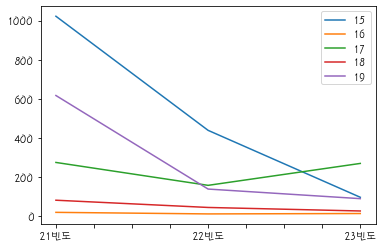

In [433]:
df_line = df_base2[15:20]
df_for_graph = df_line.drop("챔프명", axis =1)
df_for_graph = df_for_graph.T
df_for_graph.plot()

In [415]:
df_graph = df_base.sort_values("챔프명")

In [416]:
df_graph

,챔프명,20빈도,21빈도,22빈도,23빈도
0,가렌,143,113,177,108
1,갈리오,556,329,54,72
126,갱플,154,94,72,81
2,그라가스,343,145,152,37
3,그레이브즈,54,52,49,13
...,...,...,...,...,...
122,판테온,105,140,99,48
158,피들,809,49,25,43
123,피오라,540,340,170,173
124,피즈,44,51,39,55


In [ ]:
#  150개에 달하는 챔피언이 대략 10개 가량의 패치노트에 해당되려면 어느정도 큰 표본이 필요하다 판단
#  패치기간 해당되는 변화율 기준 상위 50개의 챔피언을 패치대상 리스트와 merge하여 포함되는지 확인
patch11_21 = ['징크스','럭스','사이온','비에고','자야', '티모', '아크샨','카서스', '미스 포츈', '그레이브즈', '퀸']
patch11_22 = ['아칼리','칼리스타','케인','레넥톤','바이','리븐','바루스','그레이브즈', '카직스', '마오카이', '키아나', '유미']
patch11_24 = ['사미라','아이번','우르곳','카밀','케이틀린','케일','클레드','트위치']

In [434]:
df21 = pd.DataFrame({'챔프명':['징크스','럭스','사이온','비에고','자야', '티모', '아크샨','카서스', '미스 포츈', '그레이브즈', '퀸']})
df21

,챔프명
0,징크스
1,럭스
2,사이온
3,비에고
4,자야
5,티모
6,아크샨
7,카서스
8,미스 포츈
9,그레이브즈


In [435]:
df22 = pd.DataFrame({'챔프명':['아칼리','칼리스타','케인','레넥톤','바이','리븐','바루스','그레이브즈', '카직스', '마오카이', '키아나', '유미']})
df22

,챔프명
0,아칼리
1,칼리스타
2,케인
3,레넥톤
4,바이
5,리븐
6,바루스
7,그레이브즈
8,카직스
9,마오카이


In [442]:
df24 = pd.DataFrame({'챔프명':['사미라','아이번','우르곳','카밀','케이틀린','케일','클레드','트위치']})
df24

,챔프명
0,사미라
1,아이번
2,우르곳
3,카밀
4,케이틀린
5,케일
6,클레드
7,트위치


In [445]:
# 변화율 상위 50위권을 추려서 패치노트와 비교
df_test = df_all.sort_values("변화율20~21")[-50:]
df_test

,챔프명,20빈도,21빈도,22빈도,23빈도,변화율20~21,변화율21~22,변화율22~23
152,케틀,82,140,259,251,261.0,298.0,-16.0
21,렉사이,46,82,68,53,281.0,-93.0,-124.0
19,레넥톤,338,617,139,90,292.0,-632.0,-214.0
121,파이크,331,619,59,61,303.0,-826.0,17.0
72,에코,92,174,143,122,308.0,-98.0,-79.0
58,시비르,17,34,36,20,333.0,29.0,-286.0
120,티모,341,711,325,133,352.0,-373.0,-419.0
43,빅토르,156,337,213,629,367.0,-225.0,494.0
157,빵테,10,22,17,11,375.0,-128.0,-214.0
106,케이틀린,29,67,112,119,396.0,251.0,30.0


In [446]:
df_test.merge(df22)

,챔프명,20빈도,21빈도,22빈도,23빈도,변화율20~21,변화율21~22,변화율22~23
0,레넥톤,338,617,139,90,292.0,-632.0,-214.0
1,카직스,35,83,37,58,407.0,-383.0,221.0
2,유미,429,1065,354,347,426.0,-501.0,-10.0
3,마오카이,72,494,70,76,746.0,-752.0,41.0
4,바루스,51,559,37,49,833.0,-876.0,140.0
5,바이,0,0,930,2084,NaN,1000.0,383.0
6,케인,0,0,1765,1260,NaN,1000.0,-167.0


In [444]:
df_test2 = df_all.sort_values("변화율22~23")[-50:]
df_test2

,챔프명,20빈도,21빈도,22빈도,23빈도,변화율20~21,변화율21~22,변화율22~23
110,코르키,40,35,22,32,-67.0,-228.0,185.0
162,켄치,143,104,61,91,-158.0,-261.0,197.0
41,블리츠크랭크,8,2,2,3,-600.0,0.0,200.0
31,바드,71,37,20,30,-315.0,-298.0,200.0
28,릴리아,184,87,33,50,-358.0,-450.0,205.0
34,베이가,46,36,34,52,-122.0,-29.0,209.0
149,카시,65,57,37,57,-66.0,-213.0,213.0
104,카직스,35,83,37,58,407.0,-383.0,221.0
48,샤코,449,61,51,81,-761.0,-89.0,227.0
144,알리,336,202,30,48,-249.0,-741.0,231.0


In [447]:
df_test2.merge(df24)

,챔프명,20빈도,21빈도,22빈도,23빈도,변화율20~21,변화율21~22,변화율22~23
0,카밀,594,396,243,425,-200.0,-239.0,272.0
1,케일,75,45,51,92,-250.0,62.0,287.0
2,우르곳,255,53,34,85,-656.0,-218.0,429.0
3,클레드,276,22,17,62,-852.0,-128.0,570.0
